# ☘️ PLANT DISEASE DETECTION ☘️

## Importing necessary libraries

Let's import required modules

In [6]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


We would require torchsummary library to print the model's summary in keras style (nicely formatted and pretty to look) as Pytorch natively doesn't support that

In [7]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

# 🧭 Exploring the data 🧭

Loading the data 

In [8]:
import os

path = '/config/workspace/Harvestify/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)'
if os.path.exists(path):
    print("Directory exists")
else:
    print("Directory does not exist")


Directory exists


In [9]:
data_dir = "/config/workspace/Harvestify/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [10]:
# printing the disease names
print(diseases)

['Corn_(maize)___healthy', 'Grape___healthy', 'Apple___Cedar_apple_rust', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Apple___Black_rot', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Tomato___healthy', 'Soybean___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Common_rust_', 'Potato___healthy', 'Apple___healthy', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Apple_scab', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold',

In [11]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [12]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

The above cell extract the number of unique plants and number of unique diseases

In [13]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Grape', 'Apple', 'Pepper,_bell', 'Potato', 'Peach', 'Cherry_(including_sour)', 'Strawberry', 'Tomato', 'Orange', 'Raspberry', 'Soybean', 'Squash', 'Blueberry']


In [14]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [15]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [16]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Corn_(maize)___healthy                                       1859
Grape___healthy                                              1692
Apple___Cedar_apple_rust                                     1760
Pepper,_bell___healthy                                       1988
Pepper,_bell___Bacterial_spot                                1913
Potato___Early_blight                                        1939
Apple___Black_rot                                            1987
Peach___Bacterial_spot                                       1838
Cherry_(including_sour)___Powdery_mildew                     1683
Strawberry___Leaf_scorch                                     1774
Corn_(maize)___Northern_Leaf_Blight                          1908
Strawberry___healthy                                         1824
Cherry_(including_sour)___healthy                            1826
Potato___Late_blight                                         1939
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Bacterial_spot                                      1702
Tomato___Target_Spot                                         1827
Orange___Haunglongbing_(Citrus_greening)                     2010
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Raspberry___healthy                                          1781
Tomato___healthy                                             1926
Soybean___healthy                                            2022
Tomato___Septoria_leaf_spot                                  1745
Tomato___Tomato_mosaic_virus                                 1790
Corn_(maize)___Common_rust_                                  1907
Potato___healthy                                             1824
Apple___healthy                                              2008
Squash___Powdery_mildew                                      1736
Tomato___Early_blight                                        1920
Grape___Black_rot                                            1888
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Apple___Apple_scab                                           2016
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Leaf_Mold                                           1882
Blueberry___healthy                                          1816
Grape___Esca_(Black_Measles)                                 1920
Tomato___Late_blight                                         1851
Peach___healthy                                              1728

Text(0.5, 1.0, 'Images per each class of plant disease')

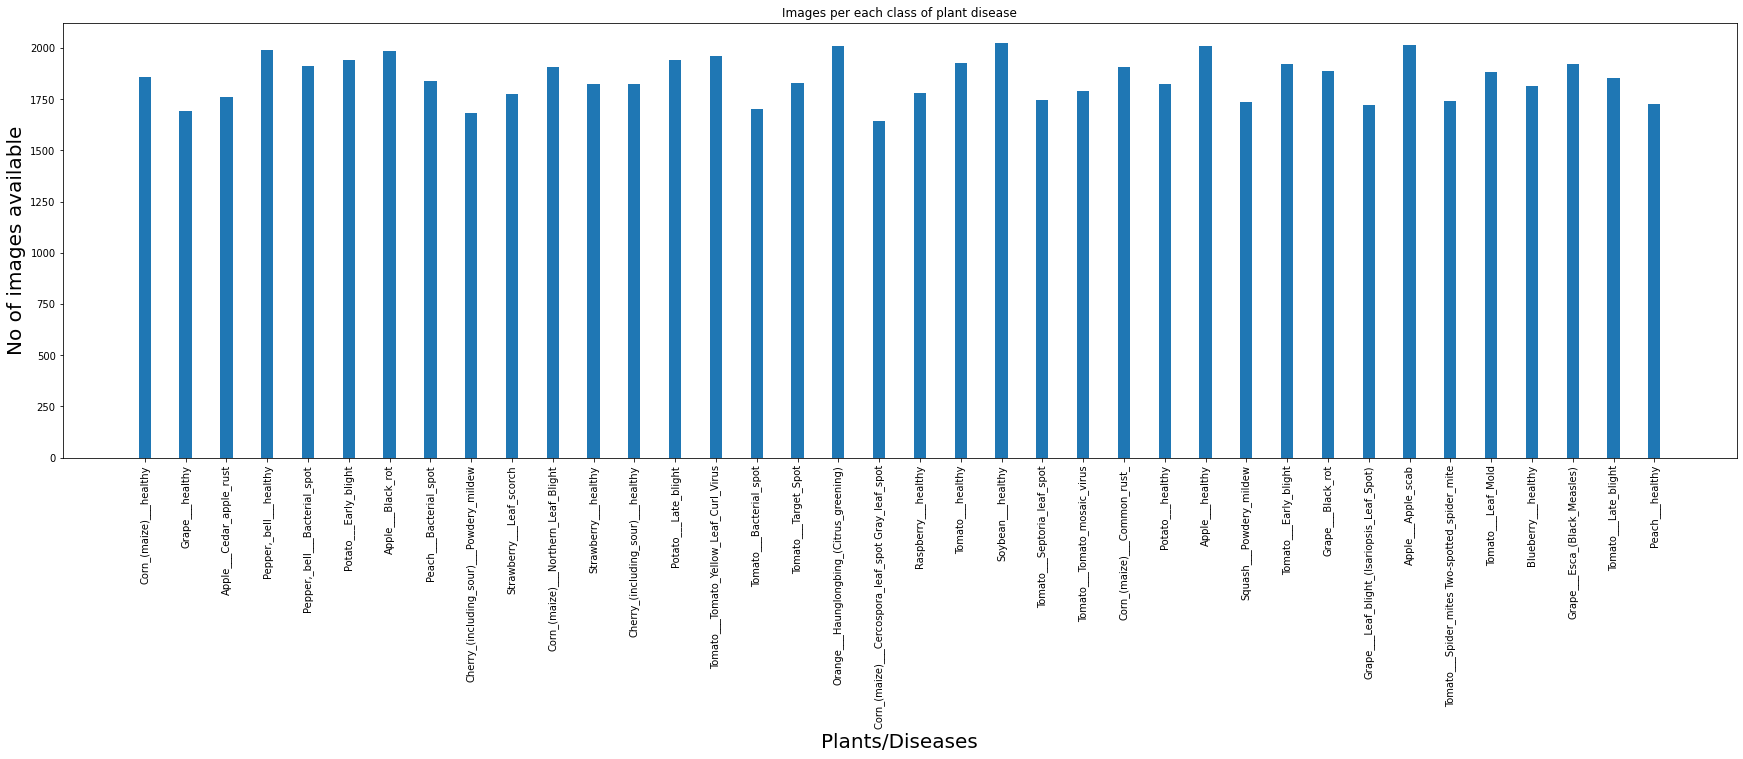

In [17]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(30, 8))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=20)
plt.ylabel('No of images available', fontsize=20)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is almost balanced for all classes, so we are good to go forward

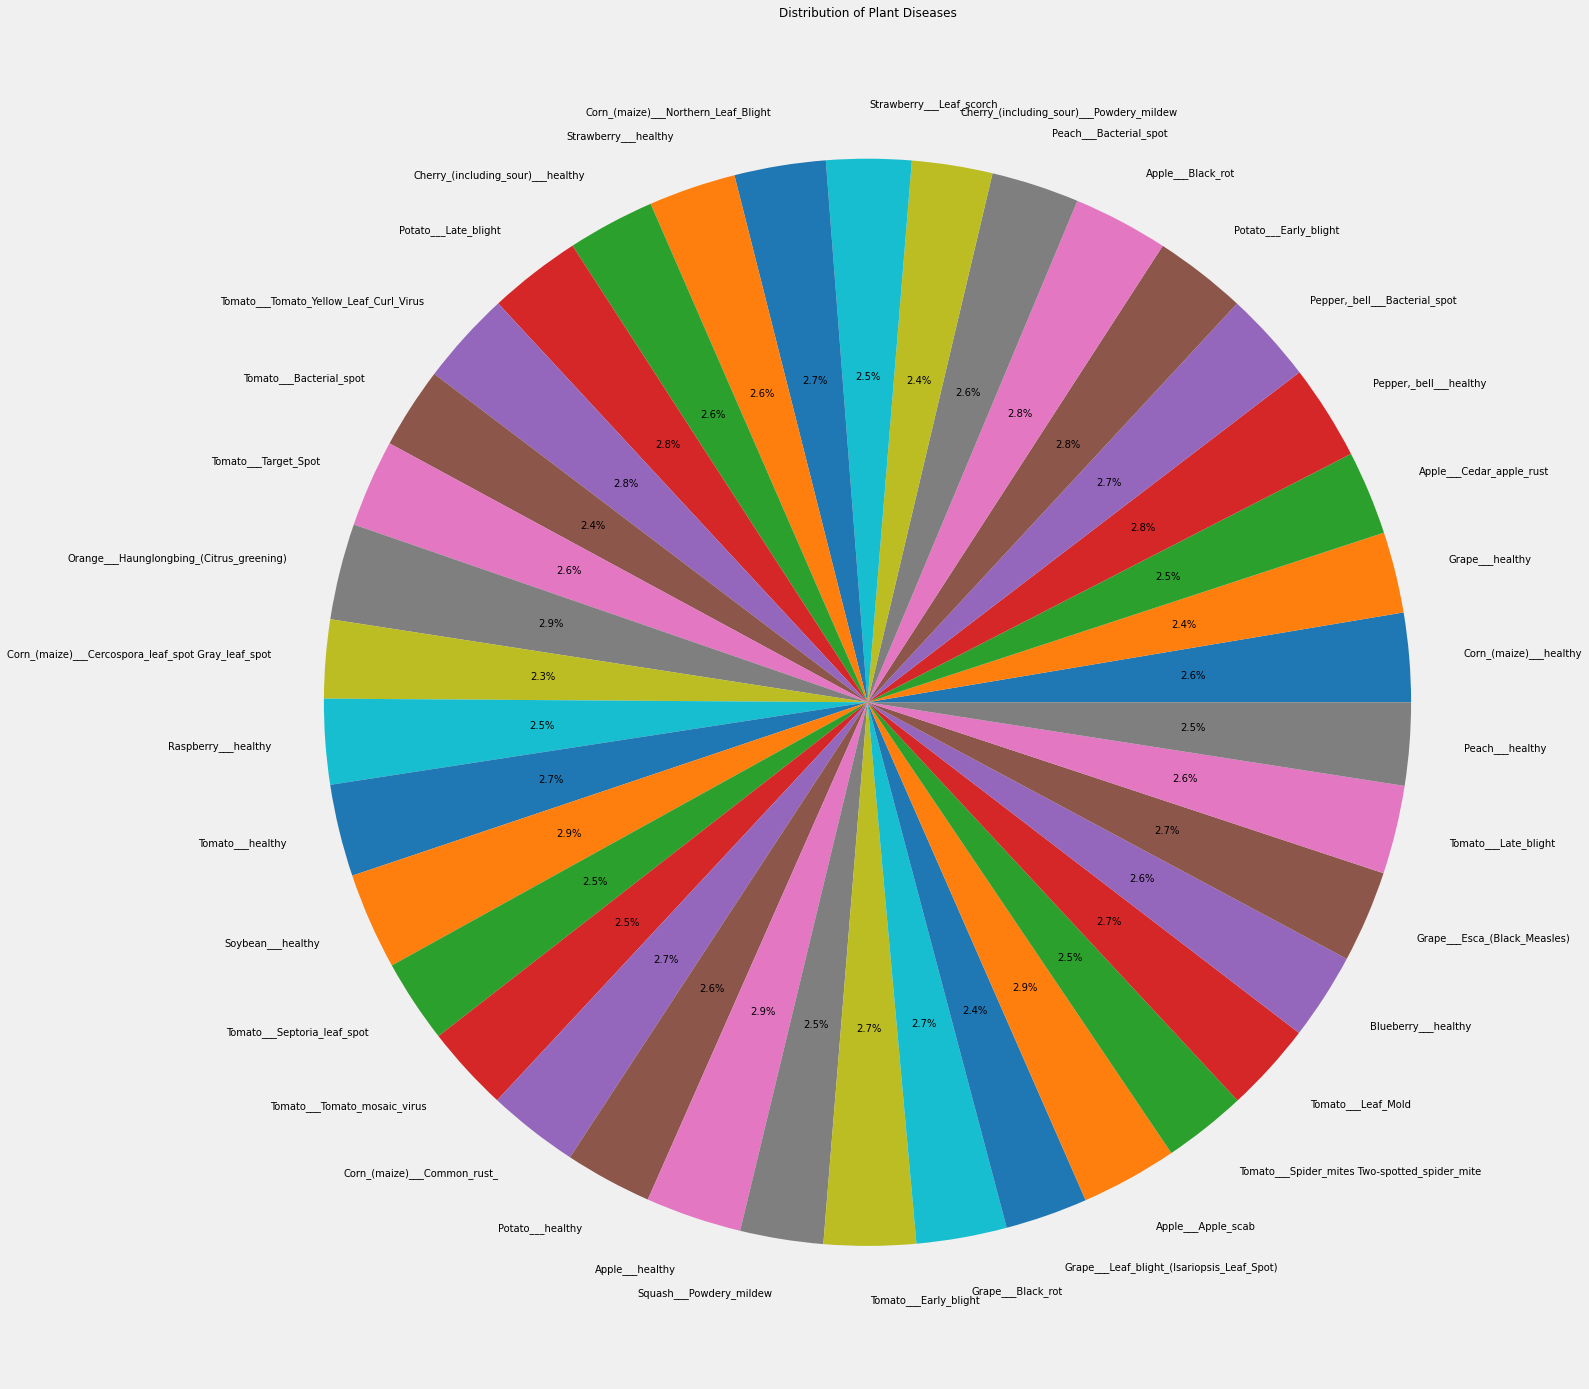

In [33]:
fig, ax = plt.subplots(figsize=(100, 25))
ax.pie(nums.values(), labels=nums.keys(),autopct='%1.1f%%')
fig.set
ax.set_title("Distribution of Plant Diseases")
fig.set_facecolor('#F0F0F0') # set background color
plt.show()


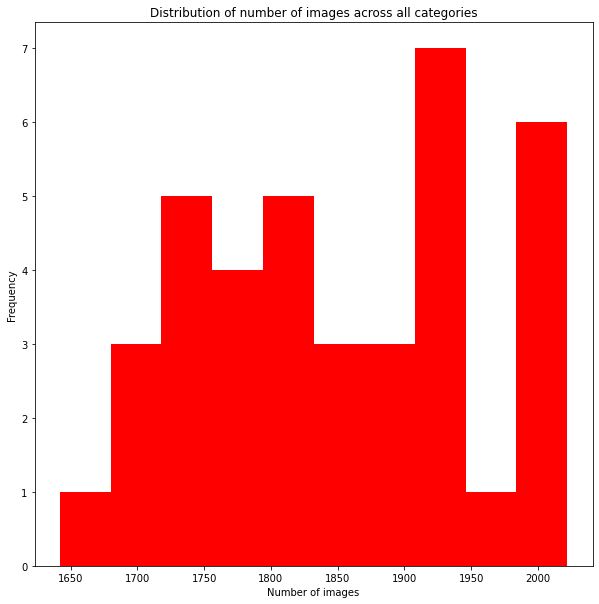

In [41]:
plt.figure(figsize=(10,10))
plt.hist([n for n in nums.values()], bins=10,color='red')
plt.xlabel('Number of images')
plt.ylabel('Frequency')
plt.title('Distribution of number of images across all categories')
plt.show()


In [42]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


# 🍳 Data Preparation for training 🍳

In [43]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

`torchvision.datasets` is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. I have used subclass `torchvision.datasets.ImageFolder` which helps in loading the image data when the data is arranged in this way:

----------------
root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png

<br>

root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

----------------

Next, after loading the data, we need to transform the pixel values of each image (0-255) to 0-1 as neural networks works quite good with normalized data. The entire array of pixel values is converted to torch [tensor](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html#:~:text=A%20PyTorch%20Tensor%20is%20basically,used%20for%20arbitrary%20numeric%20computation.) and then divided by 255.
If you are not familiar why normalizing inputs help neural network, read [this](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d) post.

#### Image shape 

We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [46]:
# total number of classes in train set
len(train.classes)

38

In [45]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## 🖼️ Some Images from training dataset 🖼️

Label :Apple___Apple_scab(0)


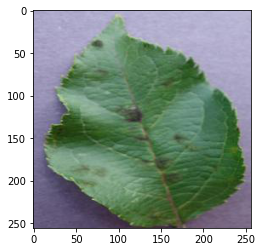

In [47]:
show_image(*train[0])

Label :Tomato___healthy(37)


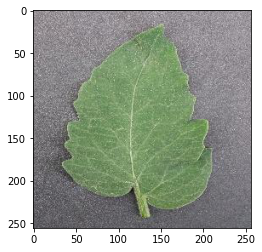

In [48]:
show_image(*train[70000])

Label :Peach___Bacterial_spot(16)


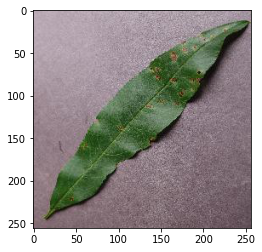

In [49]:
show_image(*train[30000])

In [50]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [51]:
# setting the batch size
batch_size = 32

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [52]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU.


In [53]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

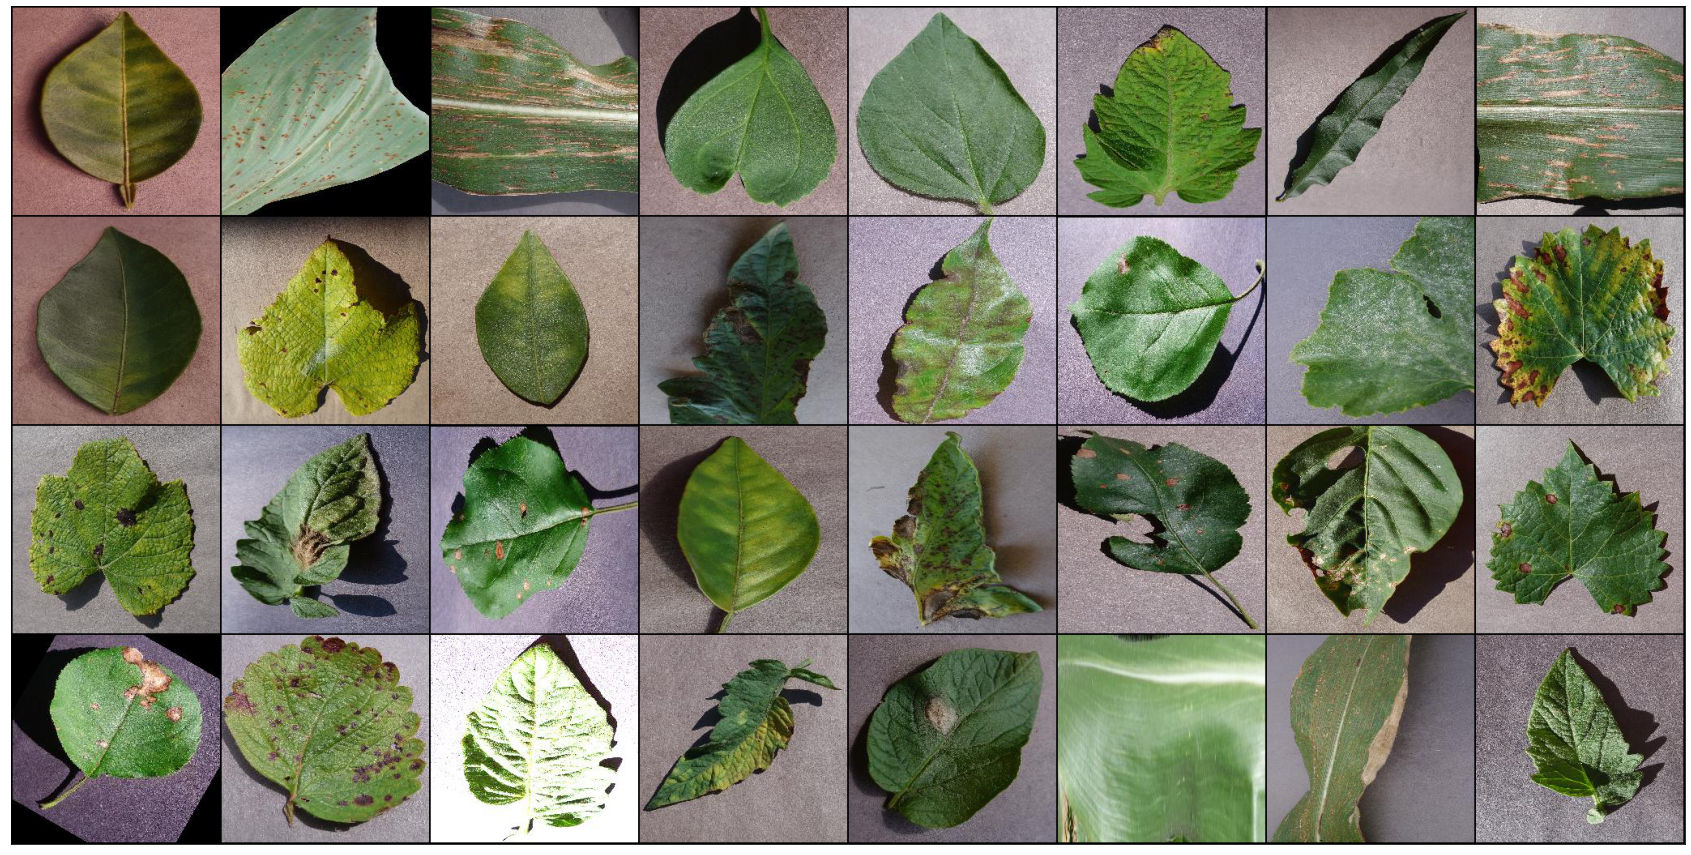

In [54]:
# Images for first batch of training
show_batch(train_dl) 